In this we'll use mobilenet_v2.

MobileNetV2 is a machine learning model that can classify images from the Imagenet dataset. It can also be used as a backbone in building more complex models for specific use cases.

The pretrained network can classify images into 1000 object categories.

In [184]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [185]:
# Define image shape for both models
IMAGE_SHAPE = (224, 224)

# Load pre-trained MobileNetV2 model for classification
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE + (3,))
])

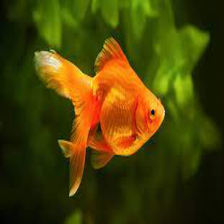

In [186]:
# importing image from local directory
gold_fish=Image.open("goldfish.jpeg").resize(IMAGE_SHAPE)
gold_fish

In [187]:
# convert image into array and normalizes pixel values between 0 and 1
gold_fish=np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

Bleow We are adding a new dimension to gold_fish to create a batch because many machine learning models expect input data to be in batches. Even if we only have one image, the model still needs the input to be shaped like a batch of images.

Visual
Original: (128, 128, 3) - Single image
New: (1, 128, 128, 3) - Batch with one image

In [188]:
gold_fish[np.newaxis,...].shape

(1, 224, 224, 3)

In [189]:
# use the model to make a prediction on image
result = classifier.predict(gold_fish[np.newaxis,...])
result

2024-05-22 01:45:38.156002: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 854ms/step


array([[ 0.289978 ,  3.024711 ,  9.944584 , ..., -0.83673  , -1.2241414,
        -1.040865 ]], dtype=float32)

In [190]:
result.shape

(1, 1001)

In [191]:
predicted_label_index=np.argmax(result)
predicted_label_index

2

**If we check with ImageNetLabels.txt then 2 is goldfish**

In [192]:
image_labels=[]
with open("ImageNetLabels.txt","r") as f:
    image_labels=f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

### Load flowers dataset

In [193]:
# Define the URL for the dataset and download it using TensorFlow's utility function

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 29s 0us/step


In [194]:
# Convert the data directory path to a pathlib object
#Pathlib is a native Python library for handling files
#and paths on your operating system.

import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

**You can use pathlib object "data_dir" to do operation like give me all the images with .jpg extenstion.**

In [195]:
#getting images with .jpg extenstion.

list(data_dir.glob("*/*.jpg"))[:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

In [196]:
# Total number of images we have

image_count = len(list(data_dir.glob("*/*.jpg")))
image_count

3670

In [197]:
# glob is usefull to get path of images with perticular lablel
roses=list(data_dir.glob("roses/*"))
roses[:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

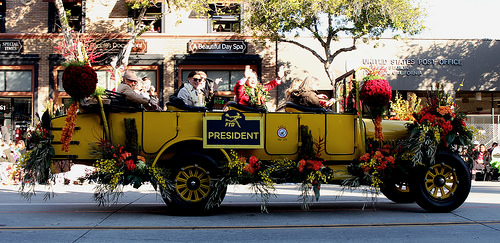

In [198]:
# Using PIL show roses

Image.open(str(roses[0]))

In [199]:
# Create dictionaries to store images and their corresponding labels
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [200]:
# Assign numerical labels to each category of flowers
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [201]:
# getting the path of perticular image
str(flowers_images_dict["roses"][0])

'datasets/flower_photos/roses/16209331331_343c899d38.jpg'

**Now we can use cv2 module to read any image file in OpenCV object(Like numpy array)**

In [202]:
# OpenCV expect string path so default one does't work
# So we need to warp up in str to give it to OpenCV

img= cv2.imread(str(flowers_images_dict["roses"][0]))

img

array([[[ 14,   3,   0],
        [  1,   0,   2],
        [  0,   0,   6],
        ...,
        [244, 245, 243],
        [244, 245, 243],
        [244, 245, 243]],

       [[  0,   0,   9],
        [  0,   0,   4],
        [  4,   7,   5],
        ...,
        [243, 244, 242],
        [243, 244, 242],
        [243, 244, 242]],

       [[  3,  57, 164],
        [ 30,  63, 132],
        [  0,   0,  19],
        ...,
        [244, 245, 243],
        [244, 245, 243],
        [244, 245, 243]],

       ...,

       [[140, 105,  85],
        [146, 112,  89],
        [147, 113,  90],
        ...,
        [155, 125,  96],
        [152, 122,  93],
        [148, 118,  89]],

       [[148, 114,  91],
        [152, 118,  95],
        [150, 116,  93],
        ...,
        [154, 124,  95],
        [152, 122,  93],
        [150, 120,  93]],

       [[153, 119,  96],
        [154, 120,  97],
        [149, 115,  91],
        ...,
        [151, 122,  95],
        [153, 123,  94],
        [151, 121,  94]]

**^ Above OpenCV read the image from disk & convert to 3D numpy array.**

In [203]:
# Viewing 3D numpy array
img.shape

(243, 500, 3)

**In the Data, we have images with a different dimensions And to train the model we Need to all the images in Same dimensions. OpenCV Help with that.**

In [204]:
# Getting the keys and values from our dictionary
for flowers_name,images in flowers_images_dict.items():
    print(flowers_name)
    print(len(images))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [205]:
# Preparing the X and Y while Resizing the images
x,y=[],[]

for flowers_name,images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img=cv2.resize(img,(224,224))
        x.append(resized_img)
        y.append(flowers_labels_dict[flowers_name])
"""You can call flowers_labels_dict becoz of
Shared Keys: Both flowers_images_dict and flowers_labels_dict use the same keys
(flower category names like 'roses', 'daisy', etc.).
"""

"You can call flowers_labels_dict becoz of\nShared Keys: Both flowers_images_dict and flowers_labels_dict use the same keys\n(flower category names like 'roses', 'daisy', etc.).\n"

In [206]:
# For further operations we need X Y in NumPy Arrays so we do Conversion to NumPy Arrays

x=np.array(x)
y=np.array(y)

In [207]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

In [208]:
x_test[0]

array([[[  2,   2,   2],
        [  1,   1,   1],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[  3,   3,   3],
        [  1,   1,   1],
        [  4,   4,   4],
        ...,
        [  4,   4,   4],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [ 33,  33,  33],
        [112, 112, 112],
        ...,
        [114, 114, 114],
        [ 34,  34,  34],
        [  1,   1,   1]],

       ...,

       [[  4,   4,   4],
        [  2,   2,   2],
        [  9,   9,   9],
        ...,
        [  9,   9,   9],
        [  2,   2,   2],
        [  4,   4,   4]],

       [[  0,   0,   0],
        [  1,   1,   1],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  0,   0,   0]],

       [[  1,   1,   1],
        [  0,   0,   0],
        [  4,   4,   4],
        ...,
        [  4,   4,   4],
        [  0,   0,   0],
        [  0,   0,   0]]

**Image data is not scalled to we need to scale it by dividing by 255**

In [209]:
# Scalling
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [210]:
# Viewing the scalled value
x_train_scaled[0]

array([[[0.69803922, 0.6745098 , 0.74901961],
        [0.69019608, 0.6745098 , 0.76470588],
        [0.7254902 , 0.69803922, 0.79607843],
        ...,
        [0.12941176, 0.21960784, 0.21176471],
        [0.1372549 , 0.2       , 0.18823529],
        [0.07058824, 0.3254902 , 0.27058824]],

       [[0.70196078, 0.65882353, 0.76470588],
        [0.70588235, 0.66666667, 0.78039216],
        [0.71764706, 0.67843137, 0.78431373],
        ...,
        [0.10980392, 0.18823529, 0.18039216],
        [0.09411765, 0.16470588, 0.15294118],
        [0.07843137, 0.41568627, 0.35686275]],

       [[0.69803922, 0.63921569, 0.76078431],
        [0.72156863, 0.65882353, 0.78431373],
        [0.7254902 , 0.6627451 , 0.78039216],
        ...,
        [0.12941176, 0.18431373, 0.17647059],
        [0.11764706, 0.2       , 0.18431373],
        [0.07843137, 0.51764706, 0.44313725]],

       ...,

       [[0.20784314, 0.29803922, 0.18823529],
        [0.16862745, 0.27058824, 0.1254902 ],
        [0.18823529, 0

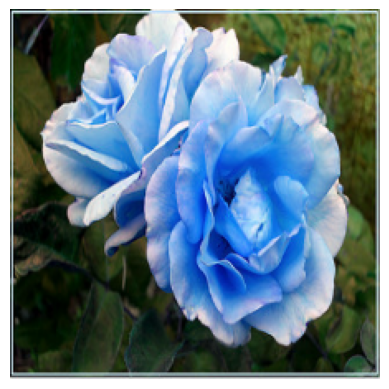

In [211]:
plt.axis("off")
plt.imshow(x[2])

In [212]:
# Using our Ready-made model for Prediction

predicted = classifier.predict(np.array([x[0],x[1], x[2]]))
predicted = np.argmax(predicted, axis=1)
predicted


2024-05-22 01:46:28.827910: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 6s 6s/step


array([795, 795, 722])

In [213]:
label_1 = image_labels[855]
label_2 = image_labels[905]
label_3 = image_labels[905]

print(label_1)
print(label_2)
print(label_3)


theater curtain
window screen
window screen


**In ImageNetLabels can have theater curtain & window screen with these flower pattren so we are getting that as output**

### Now take pre-trained model and retrain it using flowers images

In [214]:
#URL of a pre-trained MobileNetV2 model.
# This is same model as we use eailer
# But that one have classification & this one have feature_vector
# Which mean we take whole model excluding last layer
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

#creates a feature extractor model using the pre-trained MobileNetV2 model.
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [222]:
# Define the number of flower categories for classification
num_of_flowers = 5

# Create a new Sequential model
model = tf.keras.Sequential([
    # Add the pre-trained MobileNetV2 model without the top classification layer
    pretrained_model_without_top_layer,
    # Add a Dense layer with 'num_of_flowers' units for classification
    # This layer will output the logits for each flower category
    tf.keras.layers.Dense(num_of_flowers)
])

# Print the summary of the model architecture
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_20 (KerasLayer  (None, 1280)              2257984   
 )                                                               
                                                                 
 dense_9 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [223]:
# Compile the model
# 'adam' optimizer is used for training
# 'SparseCategoricalCrossentropy' is used as the loss function, which is suitable for multi-class classification problems
# 'from_logits=True' indicates that the Dense layer outputs are logits (i.e., unnormalized scores)
# 'acc' (accuracy) is used as a metric to evaluate the model performance
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

In [224]:
# Train the model
# 'x_train_scaled' and 'y_train' are the training data and labels, respectively
# Train for 5 epochs
model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5


2024-05-22 02:15:18.456186: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


86/86 [==============================] - 52s 577ms/step - loss: 0.8077 - acc: 0.7057
Epoch 2/5
86/86 [==============================] - 44s 510ms/step - loss: 0.4141 - acc: 0.8561
Epoch 3/5
86/86 [==============================] - 44s 514ms/step - loss: 0.3201 - acc: 0.8964
Epoch 4/5
86/86 [==============================] - 43s 498ms/step - loss: 0.2636 - acc: 0.9201
Epoch 5/5
86/86 [==============================] - 44s 512ms/step - loss: 0.2268 - acc: 0.9306


In [225]:
# Evaluate the model on the test data
# 'x_test_scaled' and 'y_test' are the test data and labels, respectively
# This will return the loss value and metrics specified in 'model.compile'
model.evaluate(x_test_scaled,y_test)


2024-05-22 02:19:52.788397: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - 15s 481ms/step - loss: 0.3889 - acc: 0.8682


[0.38888785243034363, 0.8681917190551758]